<a href="https://colab.research.google.com/github/Mohamed-Aref-1/E-JUST-Chatbot/blob/main/CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
CLV_Dataset = pd.read_excel('/content/Customer-Lifetime-Value-Prediction.xlsx')


In [ ]:
CLV_Dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         6817 non-null   object 
 1   Coverage      6817 non-null   object 
 2   Education     6817 non-null   object 
 3   Emp_Status    6817 non-null   object 
 4   Gender        6817 non-null   object 
 5   Income        6817 non-null   int64  
 6   Loc_Code      6817 non-null   object 
 7   M_Status      6817 non-null   object 
 8   M_Prem        6817 non-null   int64  
 9   Mo_Claim      6817 non-null   int64  
 10  Mo_Policy     6817 non-null   int64  
 11  N_Complaints  6817 non-null   int64  
 12  N_Policies    6817 non-null   int64  
 13  P_Type        6817 non-null   object 
 14  S_Channel     6817 non-null   object 
 15  T_Claims      6817 non-null   float64
 16  V_Class       6817 non-null   object 
 17  V_Size        6817 non-null   object 
 18  CLV           6817 non-null 

<font color='#C14B17' size='+2'><b> **Provide numerical summaries for the feature variables. This includes but is not limited to measures of center and spread.**</b></font>


In [ ]:
numerical_summaries = CLV_Dataset.describe()
print(numerical_summaries)

             Income       M_Prem     Mo_Claim    Mo_Policy  N_Complaints  \
count   6817.000000  6817.000000  6817.000000  6817.000000   6817.000000   
mean   50456.580461    92.963034    15.046941    47.832624      0.381840   
std    24305.956566    34.615160    10.064762    27.895350      0.905048   
min    10037.000000    61.000000     0.000000     0.000000      0.000000   
25%    28432.000000    68.000000     6.000000    24.000000      0.000000   
50%    48081.000000    83.000000    14.000000    48.000000      0.000000   
75%    70187.000000   109.000000    23.000000    71.000000      0.000000   
max    99981.000000   297.000000    35.000000    99.000000      5.000000   

        N_Policies     T_Claims           CLV  
count  6817.000000  6817.000000   6817.000000  
mean      2.951005   377.840789   8130.234707  
std       2.390613   252.648952   6949.068193  
min       1.000000     0.099007   2120.000000  
25%       1.000000   210.100003   4091.000000  
50%       2.000000   340.80

In [ ]:
categorical_columns = ['State', 'Coverage', 'Education', 'Emp_Status', 'Gender', 'Loc_Code',
                       'M_Status', 'P_Type', 'S_Channel', 'V_Class', 'V_Size']
for column in categorical_columns:
    print("Value counts for column '{}':".format(column))
    print(CLV_Dataset[column].value_counts())
    print()

Value counts for column 'State':
State
California    2346
Oregon        1937
Arizona       1273
Nevada         665
Washington     596
Name: count, dtype: int64

Value counts for column 'Coverage':
Coverage
Basic       4178
Extended    2021
Premium      618
Name: count, dtype: int64

Value counts for column 'Education':
Education
Bachelor                2037
College                 2009
High School or Below    1833
Master                   649
Doctor                   289
Name: count, dtype: int64

Value counts for column 'Emp_Status':
Emp_Status
Employed         5698
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

Value counts for column 'Gender':
Gender
F    3523
M    3294
Name: count, dtype: int64

Value counts for column 'Loc_Code':
Loc_Code
Suburban    3657
Rural       1665
Urban       1495
Name: count, dtype: int64

Value counts for column 'M_Status':
M_Status
Married     4522
Divorced    1163
Single      1132
Name: count, dtype: int64


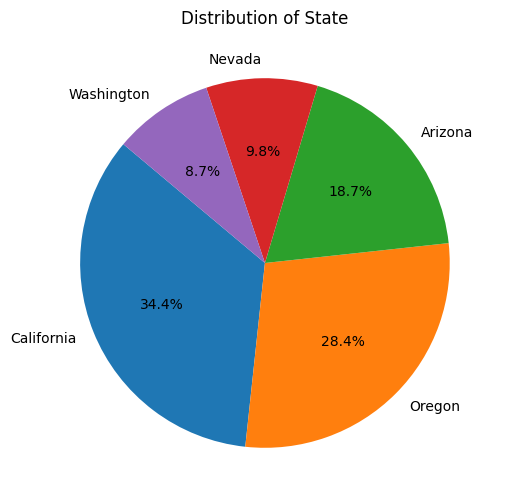

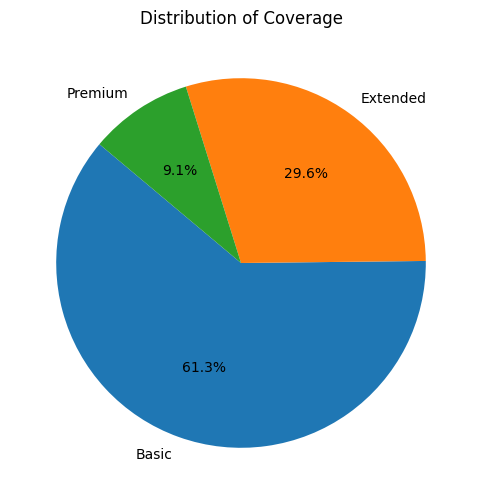

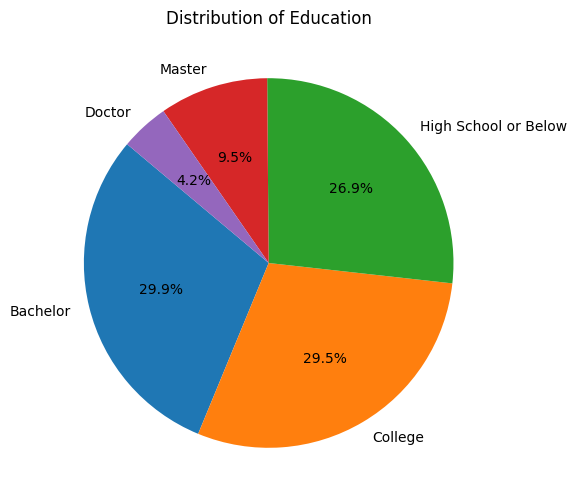

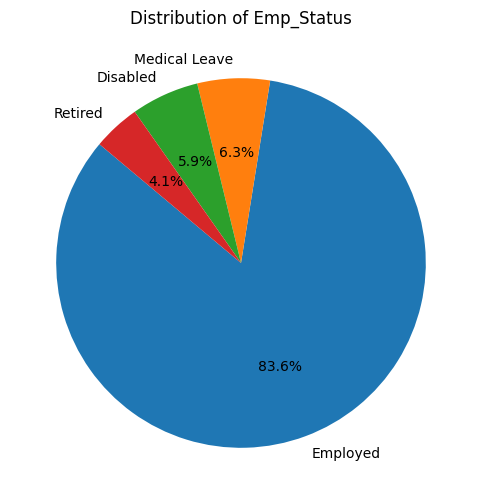

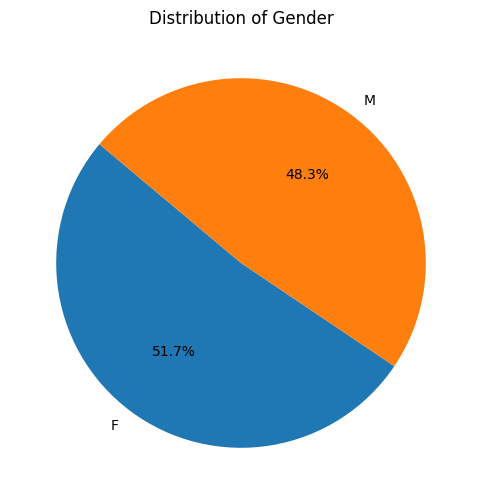

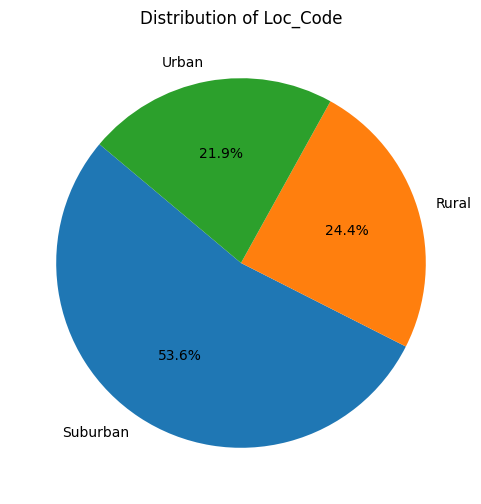

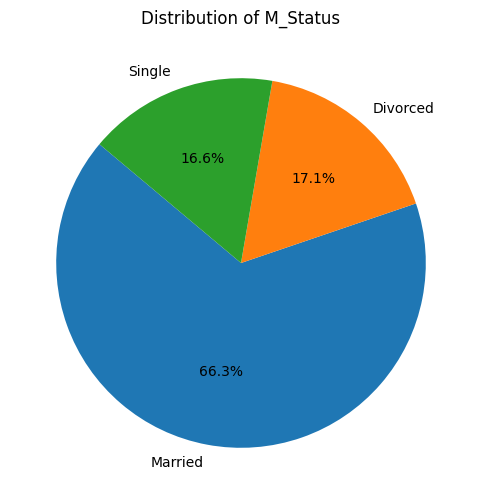

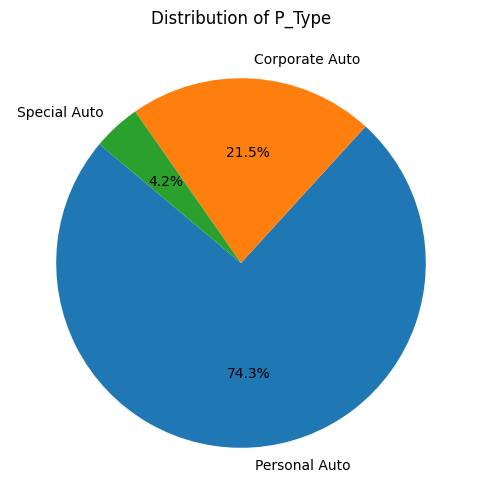

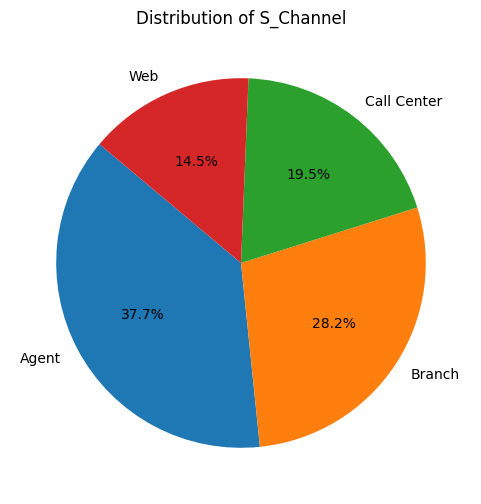

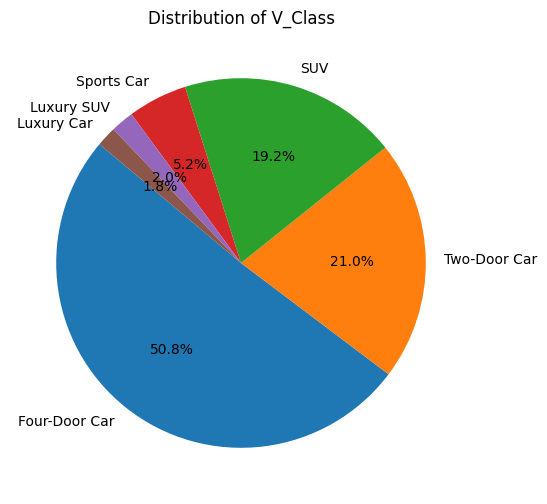

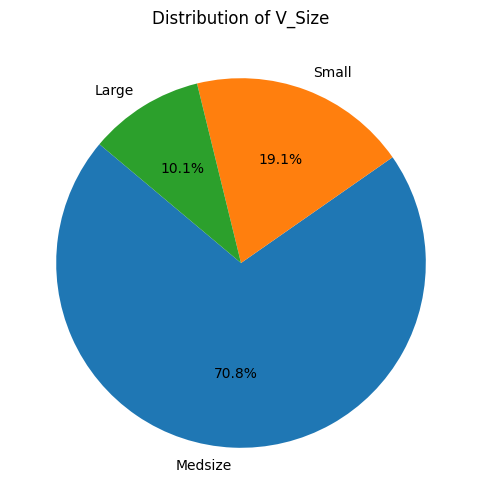

In [ ]:
import matplotlib.pyplot as plt
def plot_categorical_pie(data, column):
    plt.figure(figsize=(6, 6))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title("Distribution of {}".format(column))
    plt.ylabel("")
    plt.show()

for column in categorical_columns:
    plot_categorical_pie(CLV_Dataset, column)

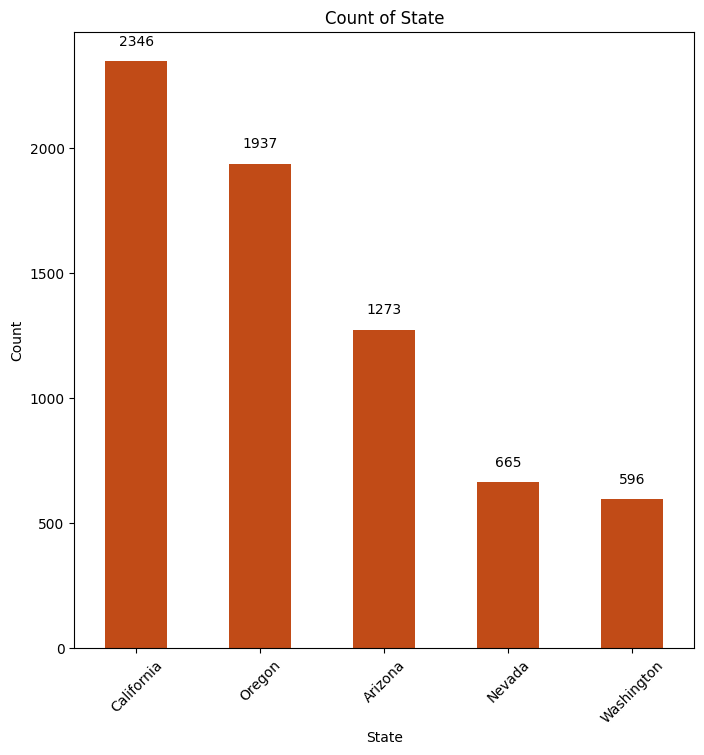

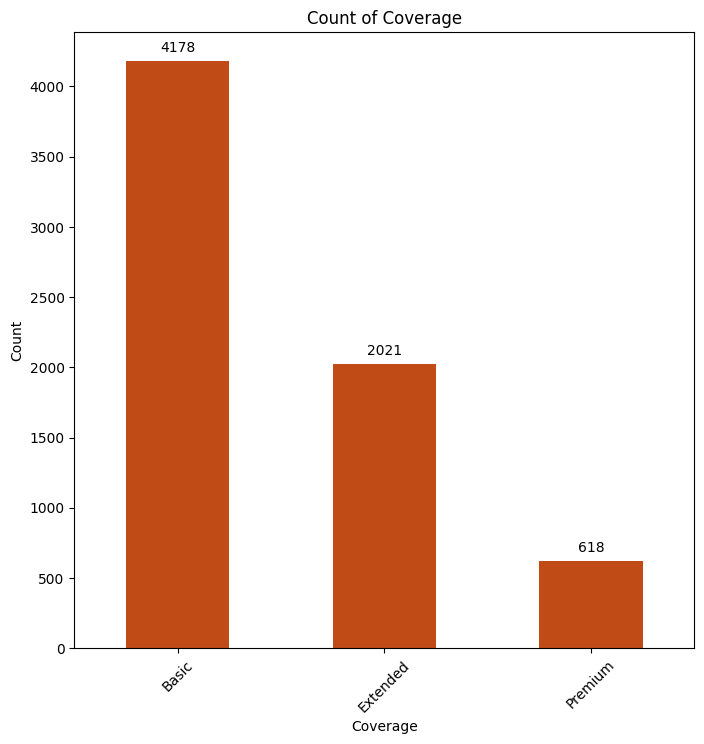

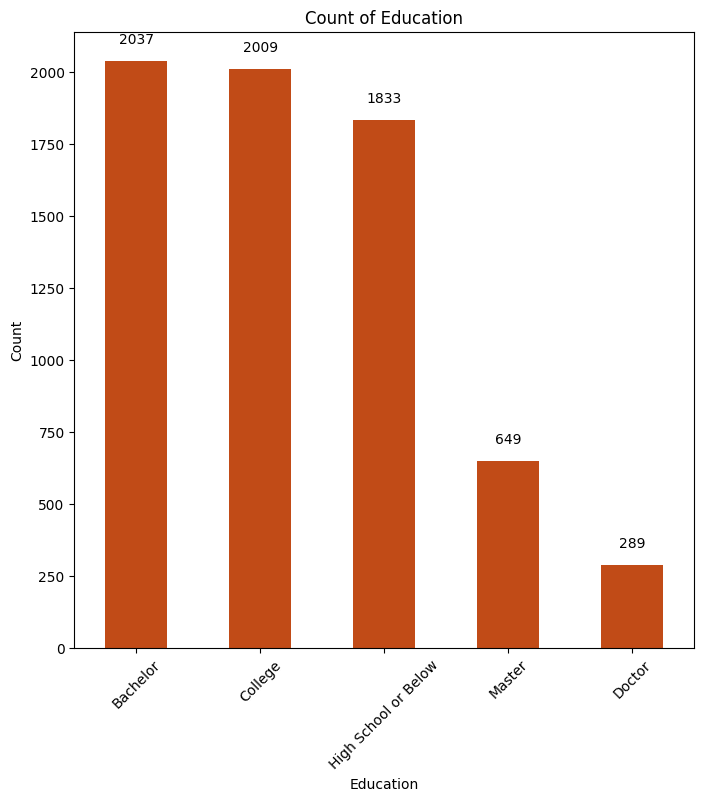

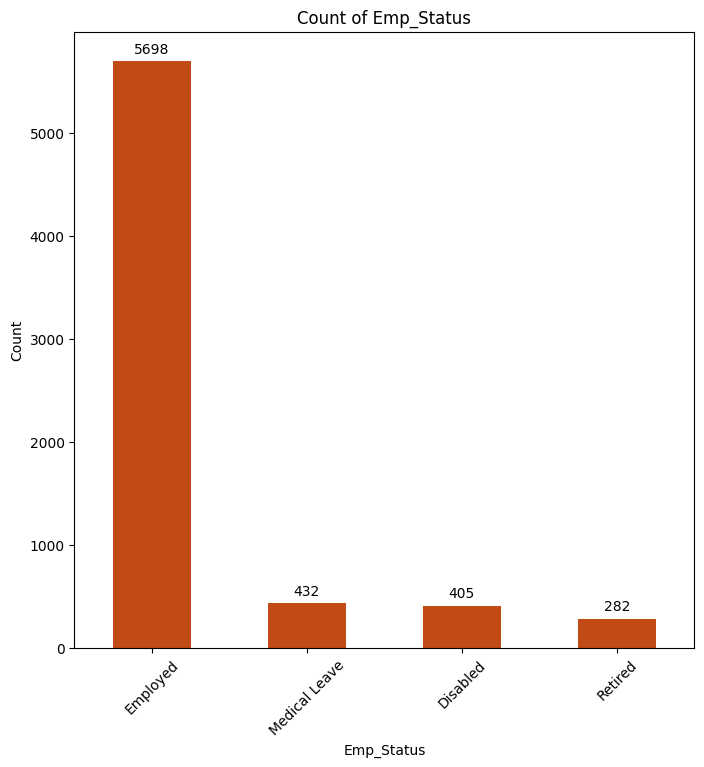

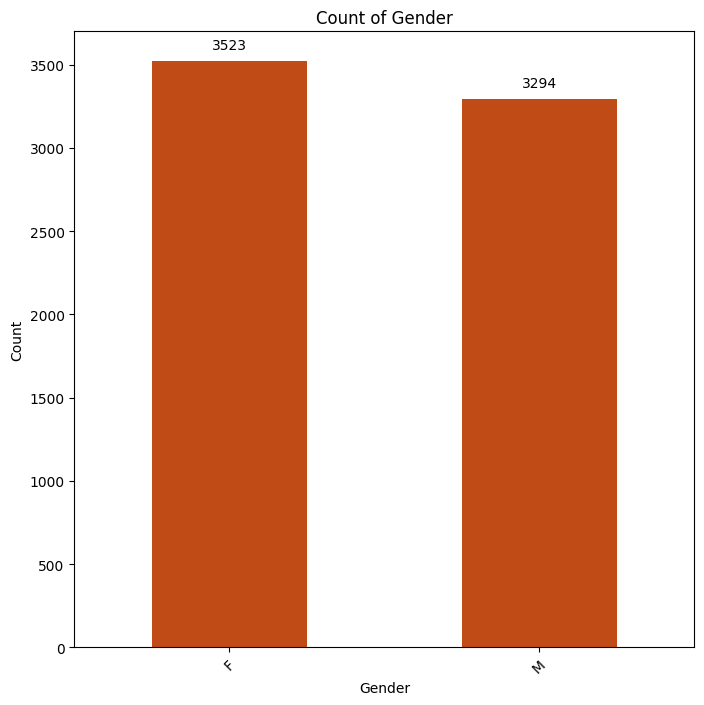

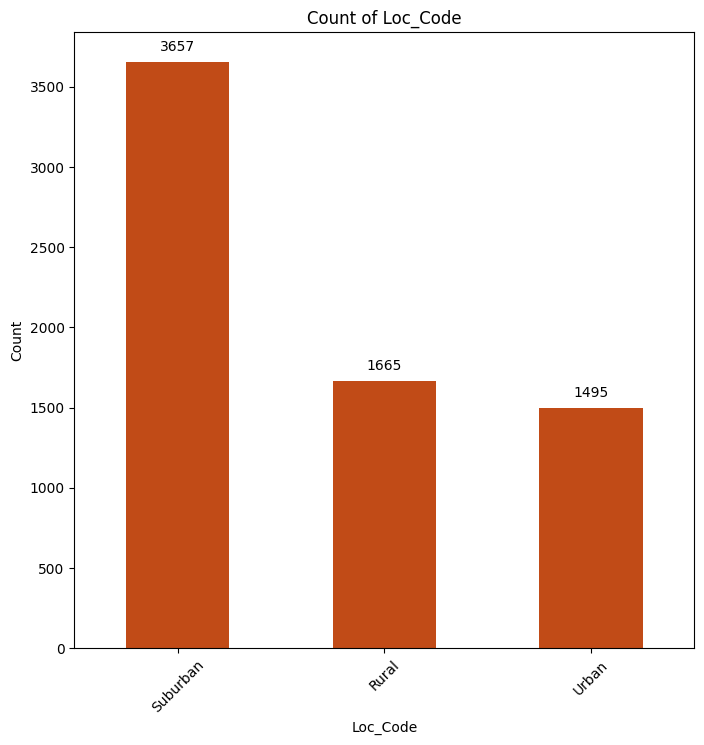

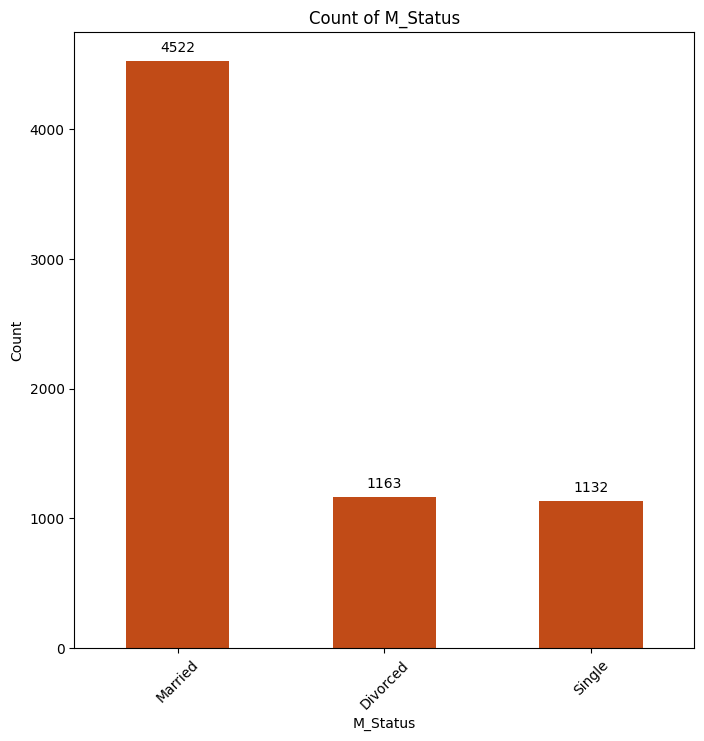

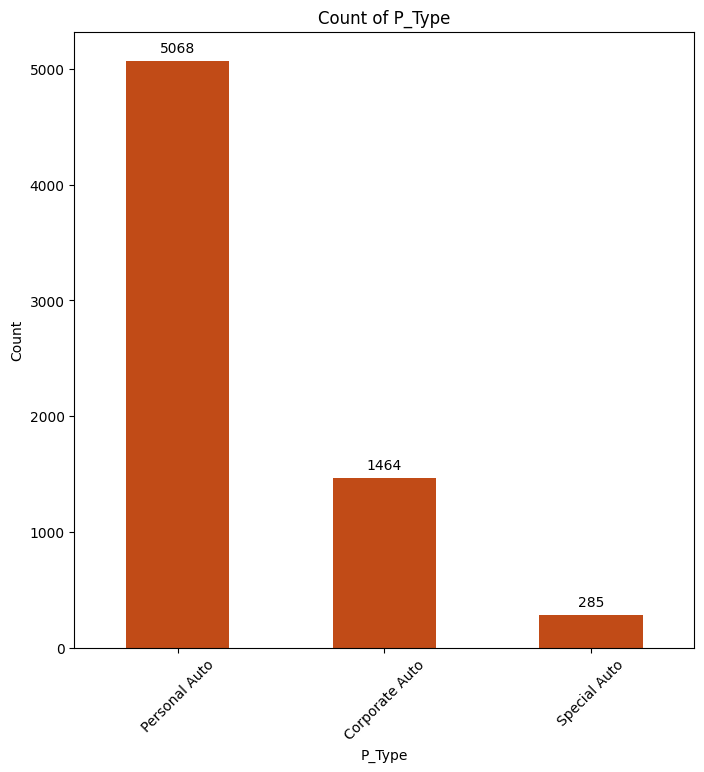

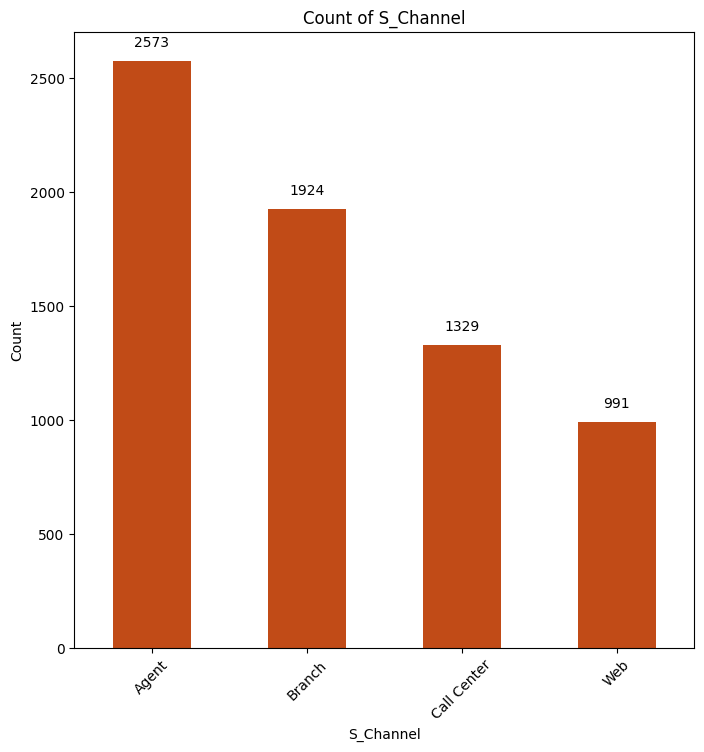

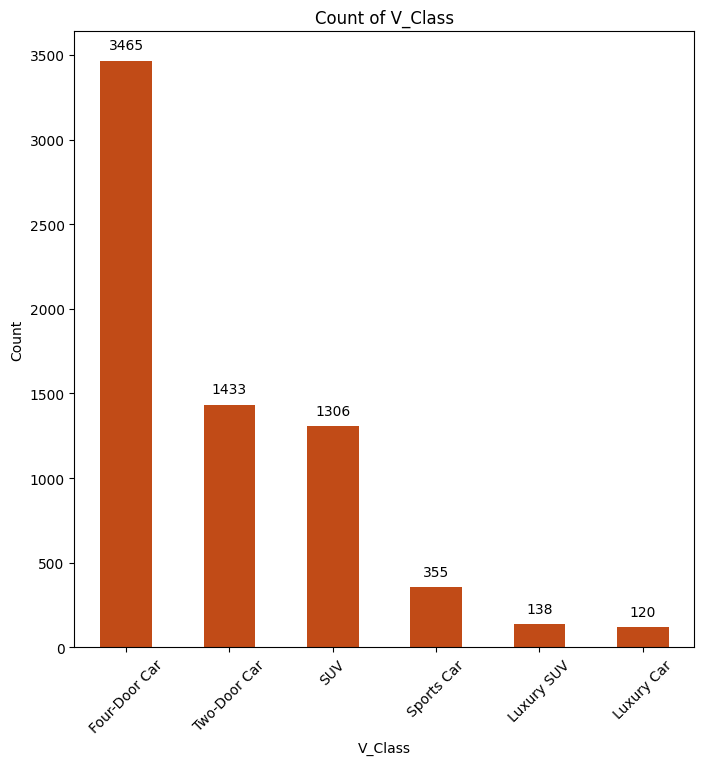

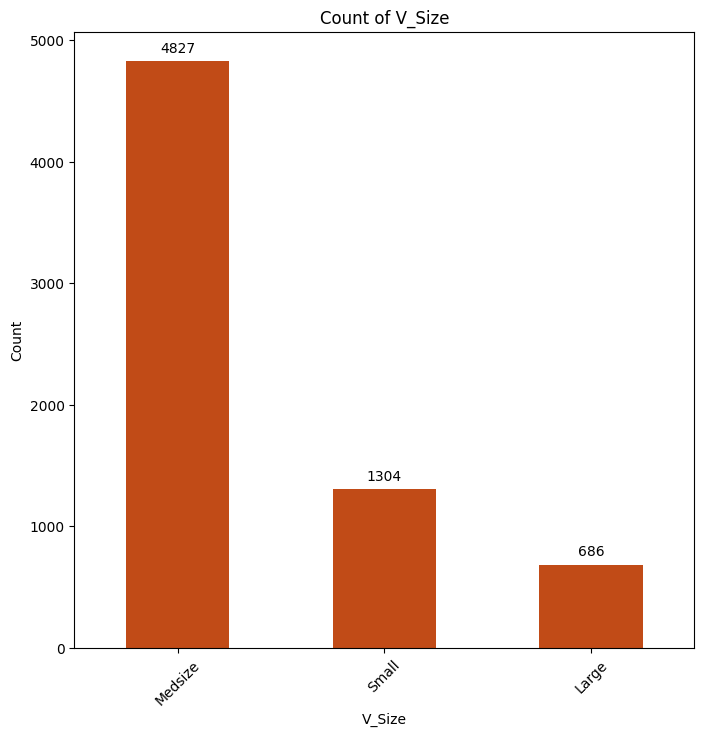

In [ ]:
def plot_categorical_bar_with_counts(data, column):
    plt.figure(figsize=(8, 8))
    value_counts = data[column].value_counts()
    value_counts.plot(kind='bar', color='#C14B17')
    for i, count in enumerate(value_counts):
        plt.text(i, count + 50, str(count), ha='center', va='bottom')

    plt.title("Count of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Plot it
for column in categorical_columns:
    plot_categorical_bar_with_counts(CLV_Dataset, column)


<font color='#C14B17' size='+2'><b> **Numerical attributes:**</b></font>


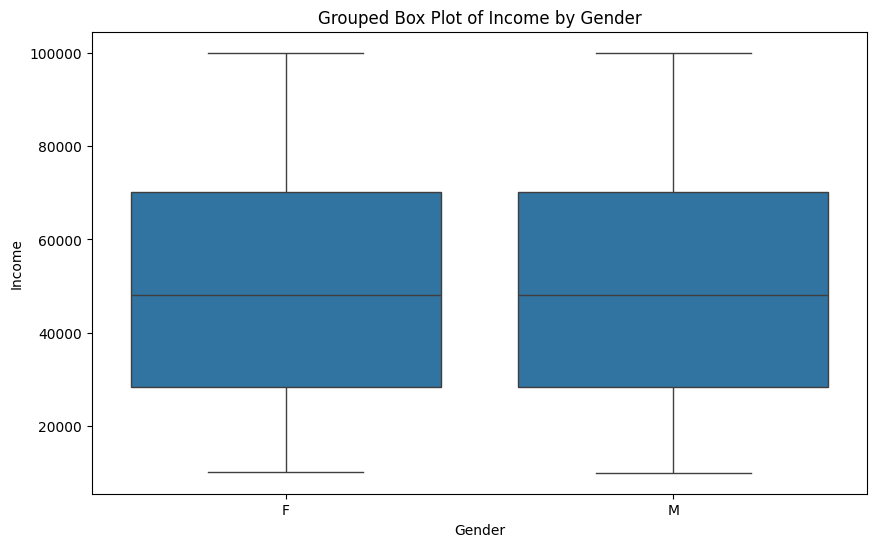

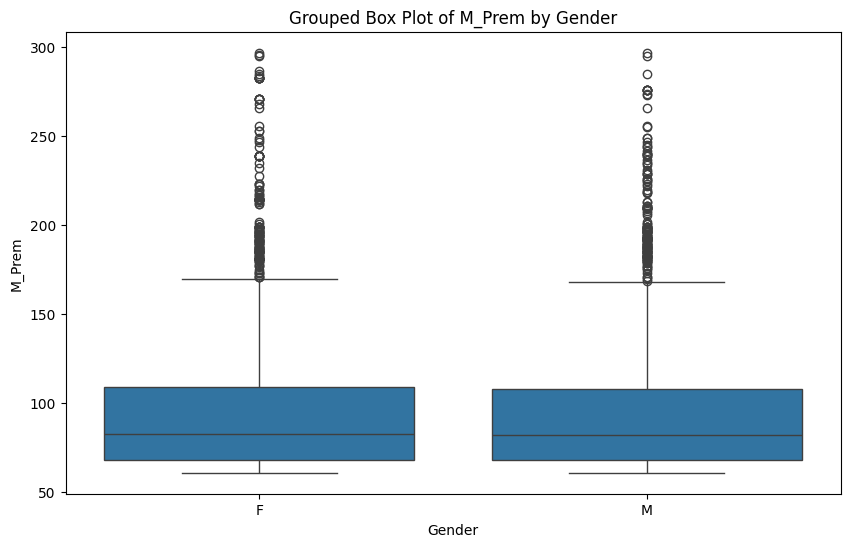

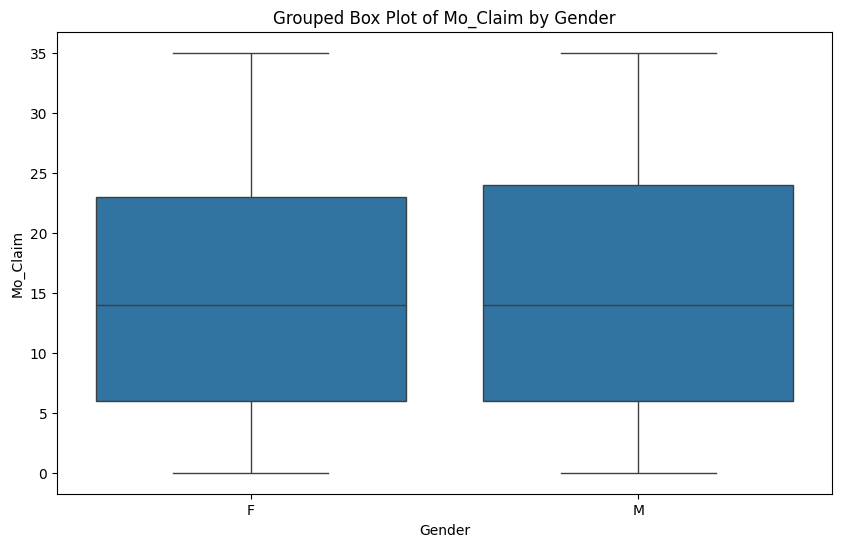

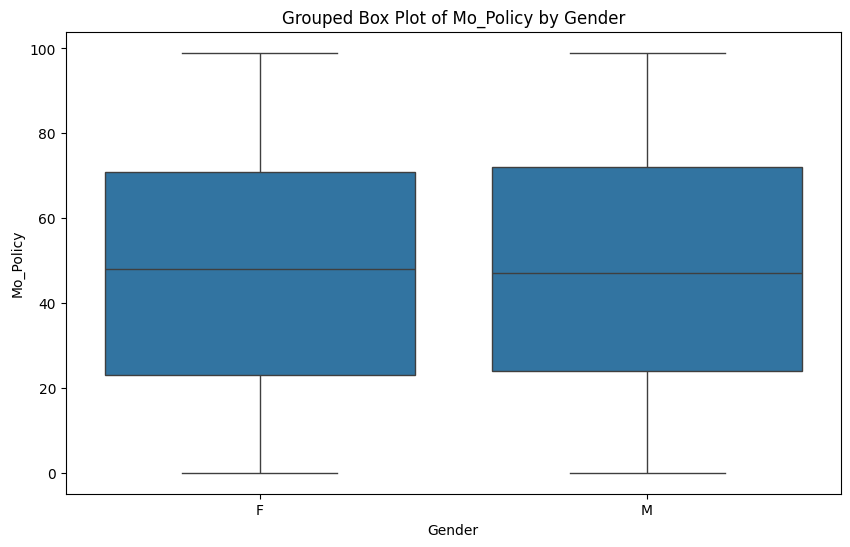

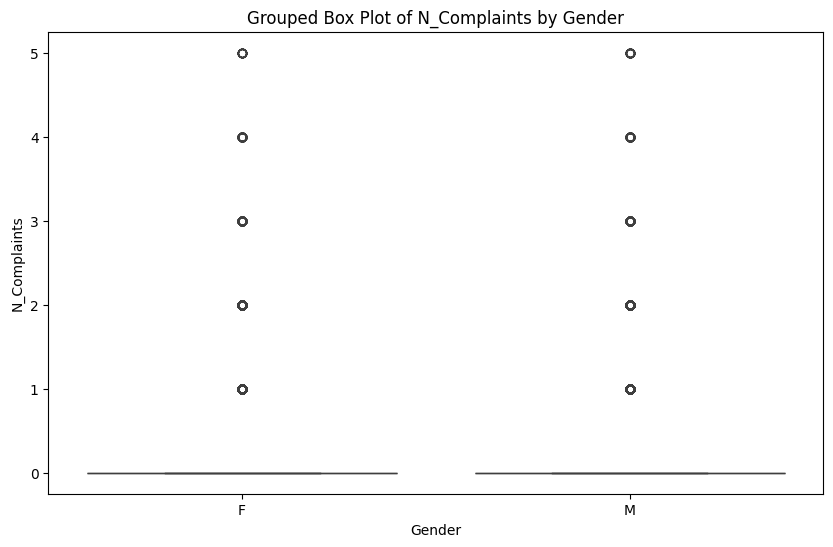

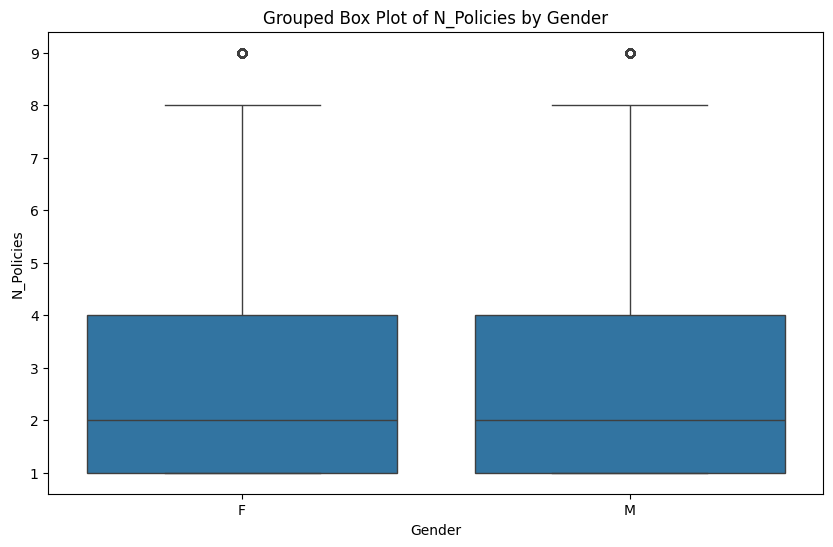

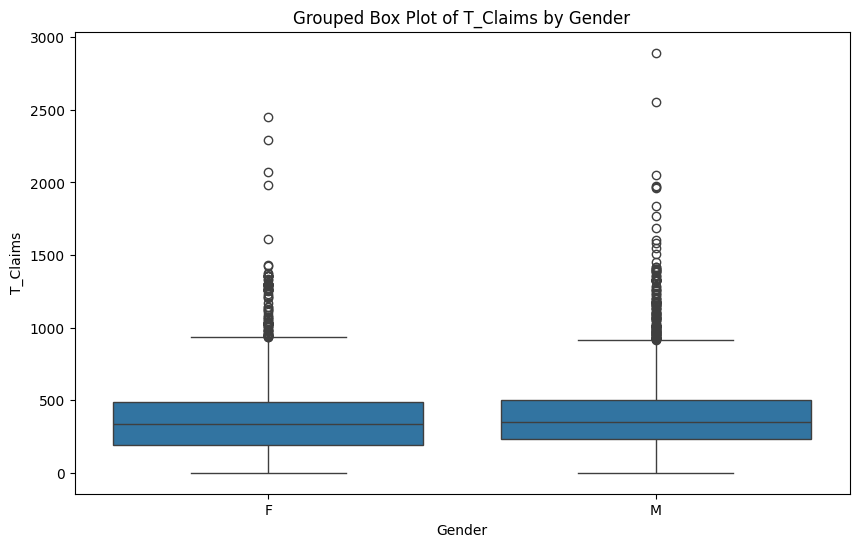

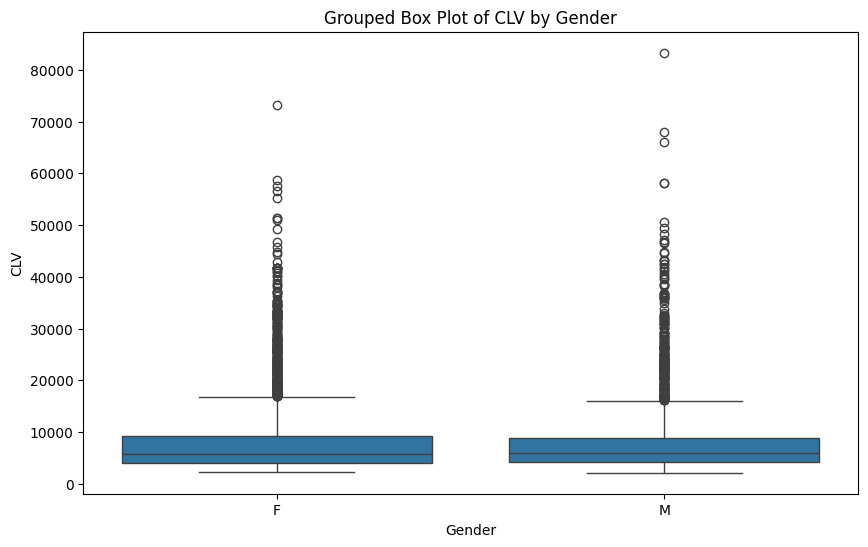

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grouped_boxplots(data, numerical_columns):

    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Gender', y=column, data=data)
        plt.title('Grouped Box Plot of {} by Gender'.format(column))
        plt.show()

# List of numerical columns
numerical_columns = ['Income', 'M_Prem', 'Mo_Claim', 'Mo_Policy',
                     'N_Complaints', 'N_Policies', 'T_Claims', 'CLV']

# Plot grouped box plots by gender for numerical attributes
plot_grouped_boxplots(CLV_Dataset, numerical_columns)


In [ ]:
for column in numerical_columns:
    print("Median for {}: {}".format(column, CLV_Dataset[column].median()))

Median for Income: 48081.0
Median for M_Prem: 83.0
Median for Mo_Claim: 14.0
Median for Mo_Policy: 48.0
Median for N_Complaints: 0.0
Median for N_Policies: 2.0
Median for T_Claims: 340.8
Median for CLV: 5811.0


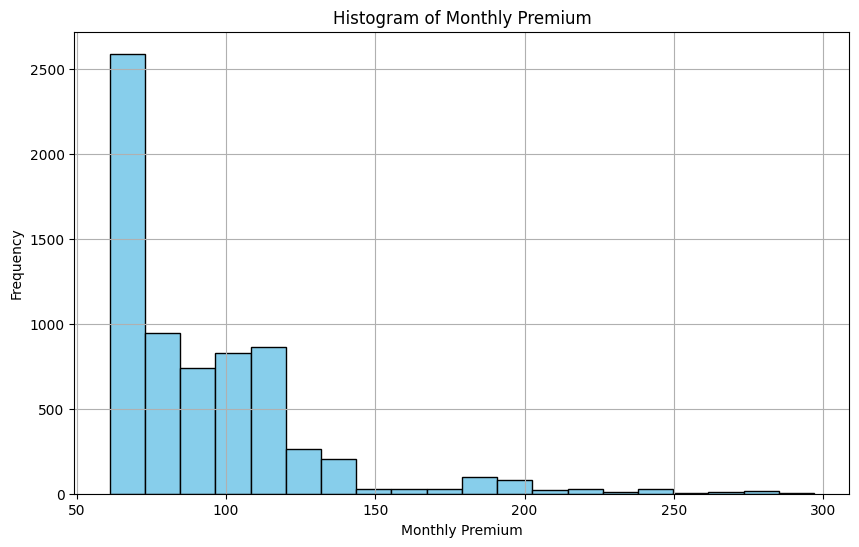

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(CLV_Dataset['M_Prem'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Premium')
plt.xlabel('Monthly Premium')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
Q3 = CLV_Dataset['M_Prem'].quantile(0.75)
num_values_greater_than_Q3 = (CLV_Dataset['M_Prem'] > Q3).sum()
print(num_values_greater_than_Q3)

#those are the number of outliers

1631


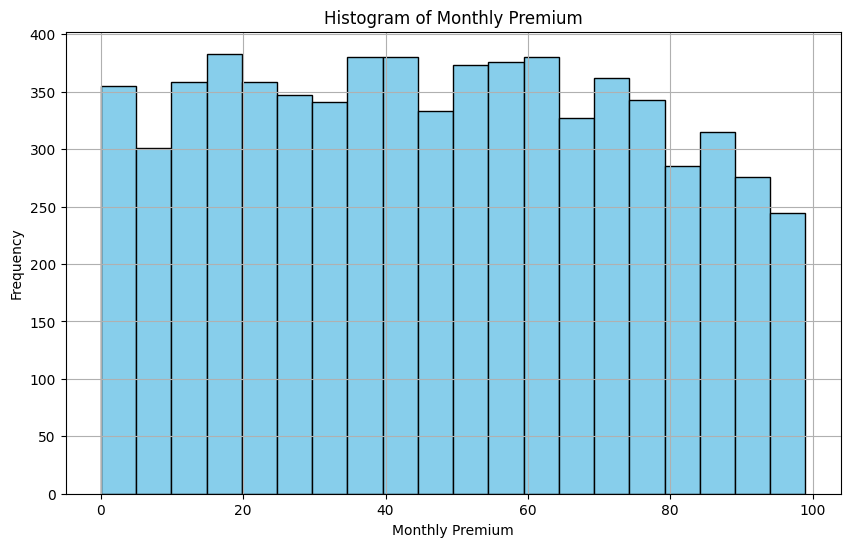

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(CLV_Dataset['Mo_Policy'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Premium')
plt.xlabel('Monthly Premium')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Kinda evenly distributed ( follows symmetrical distribution)

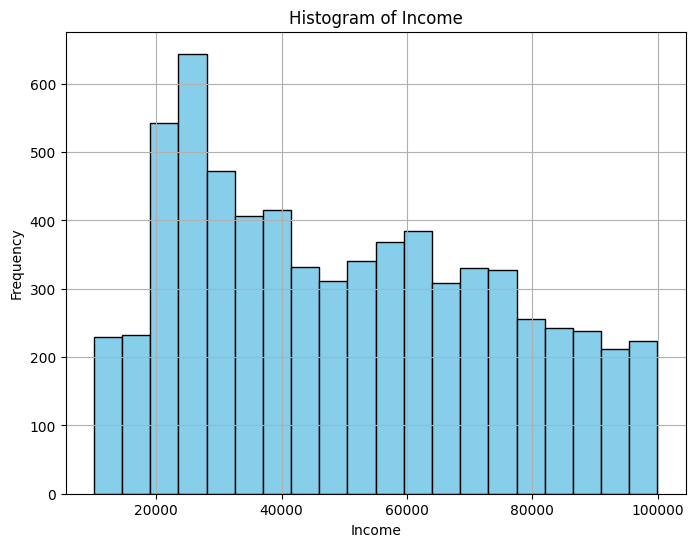

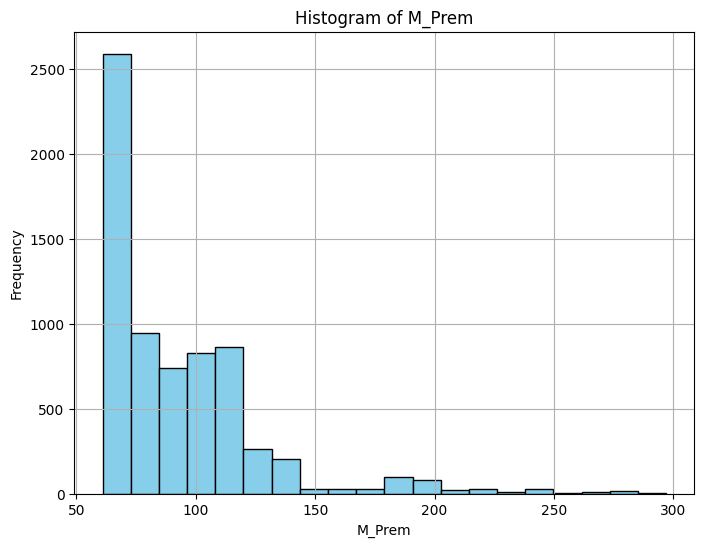

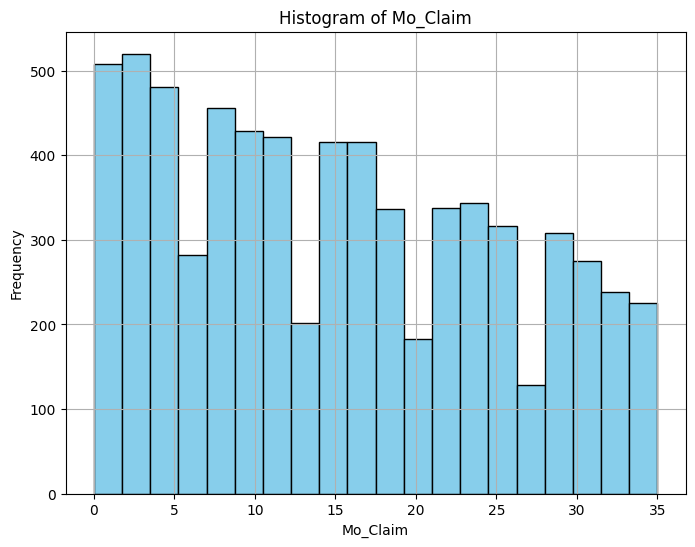

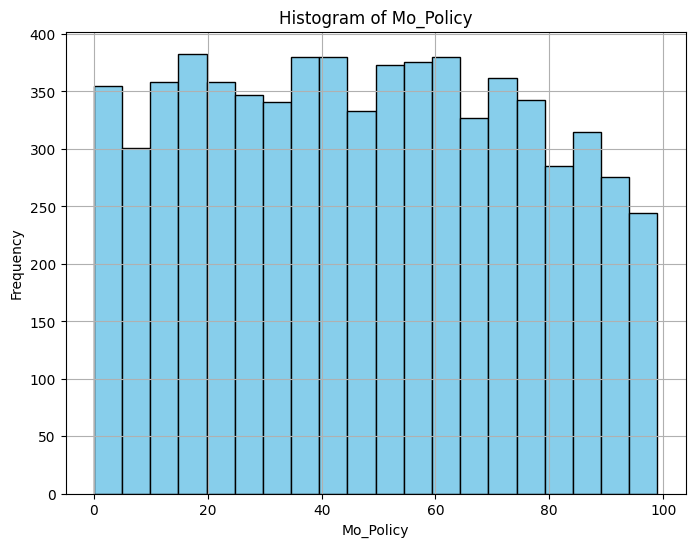

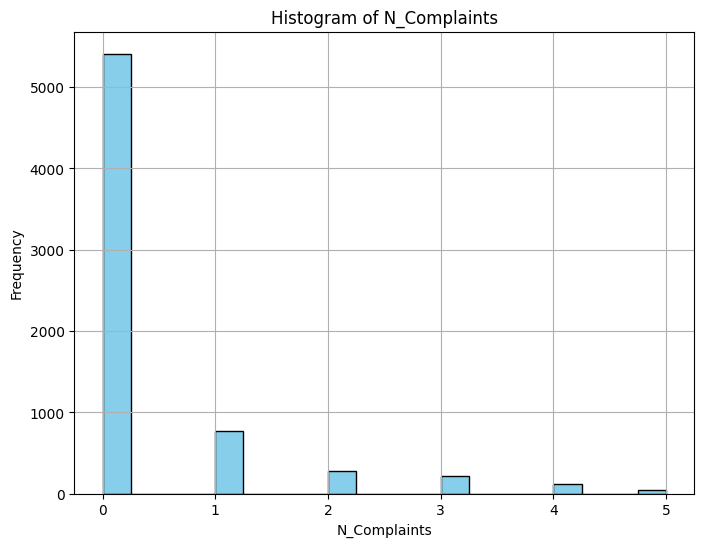

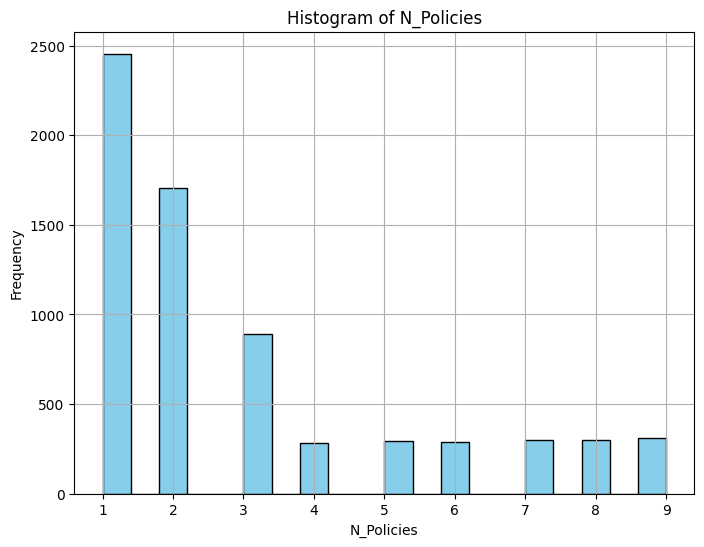

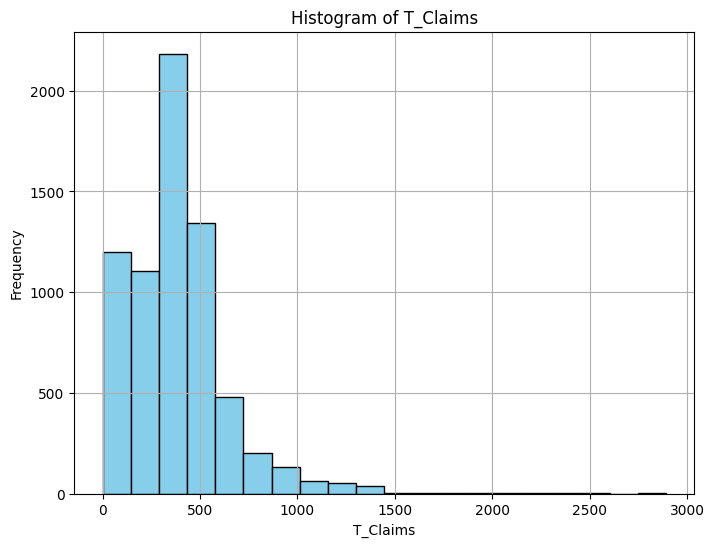

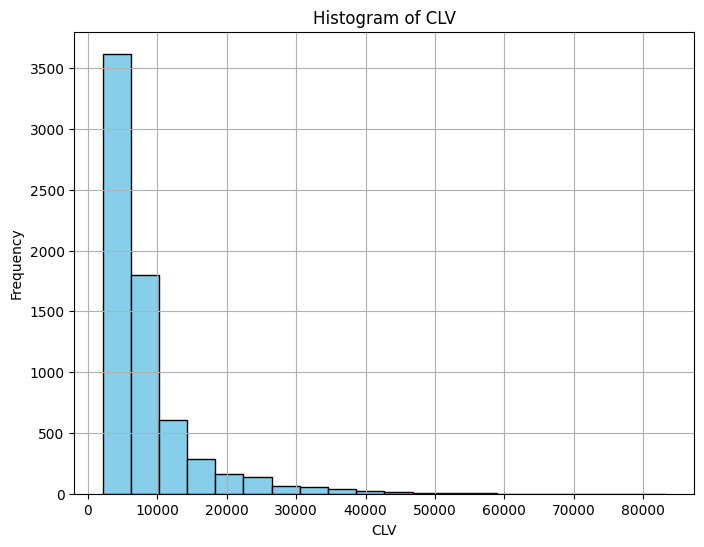

In [ ]:
import matplotlib.pyplot as plt

def plot_individual_histograms(data, numerical_columns):
    """
    Plot individual histograms for each numerical attribute in the dataset.

    Parameters:
    - data: DataFrame, the dataset containing numerical attributes.
    - numerical_columns: list of str, names of numerical columns in the dataset.
    """
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        data[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title('Histogram of {}'.format(column))
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

numerical_columns = ['Income', 'M_Prem', 'Mo_Claim', 'Mo_Policy',
                     'N_Complaints', 'N_Policies', 'T_Claims', 'CLV']

# Plot histograms for thise numerical attributes
plot_individual_histograms(CLV_Dataset, numerical_columns)


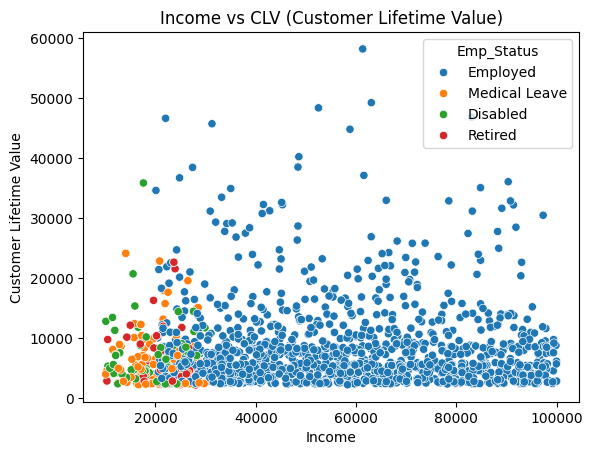

In [ ]:
import seaborn as sns

subset_data = CLV_Dataset.iloc[0:1500]

sns.scatterplot(data=subset_data, x='Income', y='CLV', hue='Emp_Status')
plt.title('Income vs CLV (Customer Lifetime Value)')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()

In [ ]:
CLV_Dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         6817 non-null   object 
 1   Coverage      6817 non-null   object 
 2   Education     6817 non-null   object 
 3   Emp_Status    6817 non-null   object 
 4   Gender        6817 non-null   object 
 5   Income        6817 non-null   int64  
 6   Loc_Code      6817 non-null   object 
 7   M_Status      6817 non-null   object 
 8   M_Prem        6817 non-null   int64  
 9   Mo_Claim      6817 non-null   int64  
 10  Mo_Policy     6817 non-null   int64  
 11  N_Complaints  6817 non-null   int64  
 12  N_Policies    6817 non-null   int64  
 13  P_Type        6817 non-null   object 
 14  S_Channel     6817 non-null   object 
 15  T_Claims      6817 non-null   float64
 16  V_Class       6817 non-null   object 
 17  V_Size        6817 non-null   object 
 18  CLV           6817 non-null 

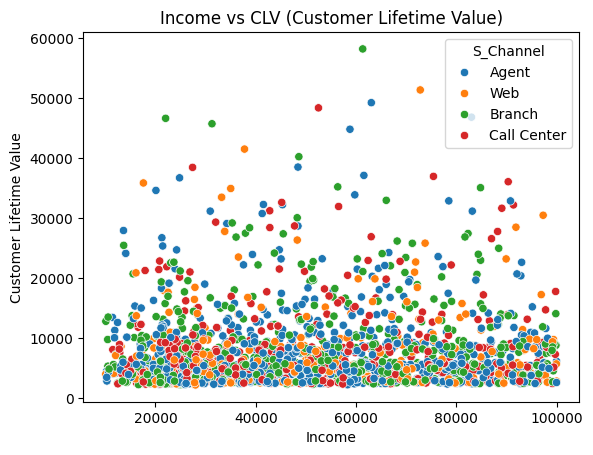

In [ ]:
import seaborn as sns

subset_data = CLV_Dataset.iloc[0:2000]

sns.scatterplot(data=subset_data, x='Income', y='CLV', hue='S_Channel')
plt.title('Income vs CLV (Customer Lifetime Value)')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()

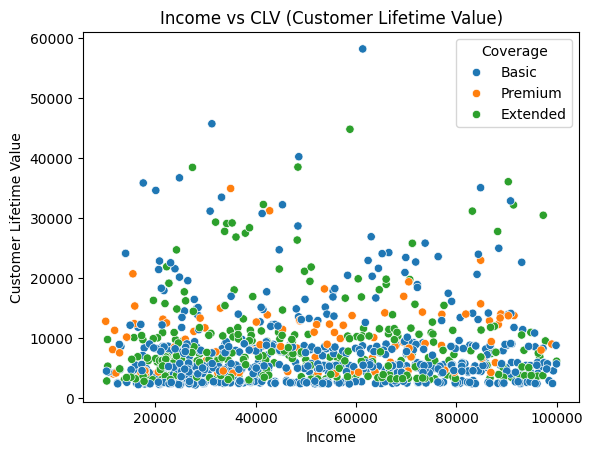

In [ ]:
import seaborn as sns

subset_data = CLV_Dataset.iloc[0:1050]

sns.scatterplot(data=subset_data, x='Income', y='CLV', hue='Coverage')
plt.title('Income vs CLV (Customer Lifetime Value)')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()

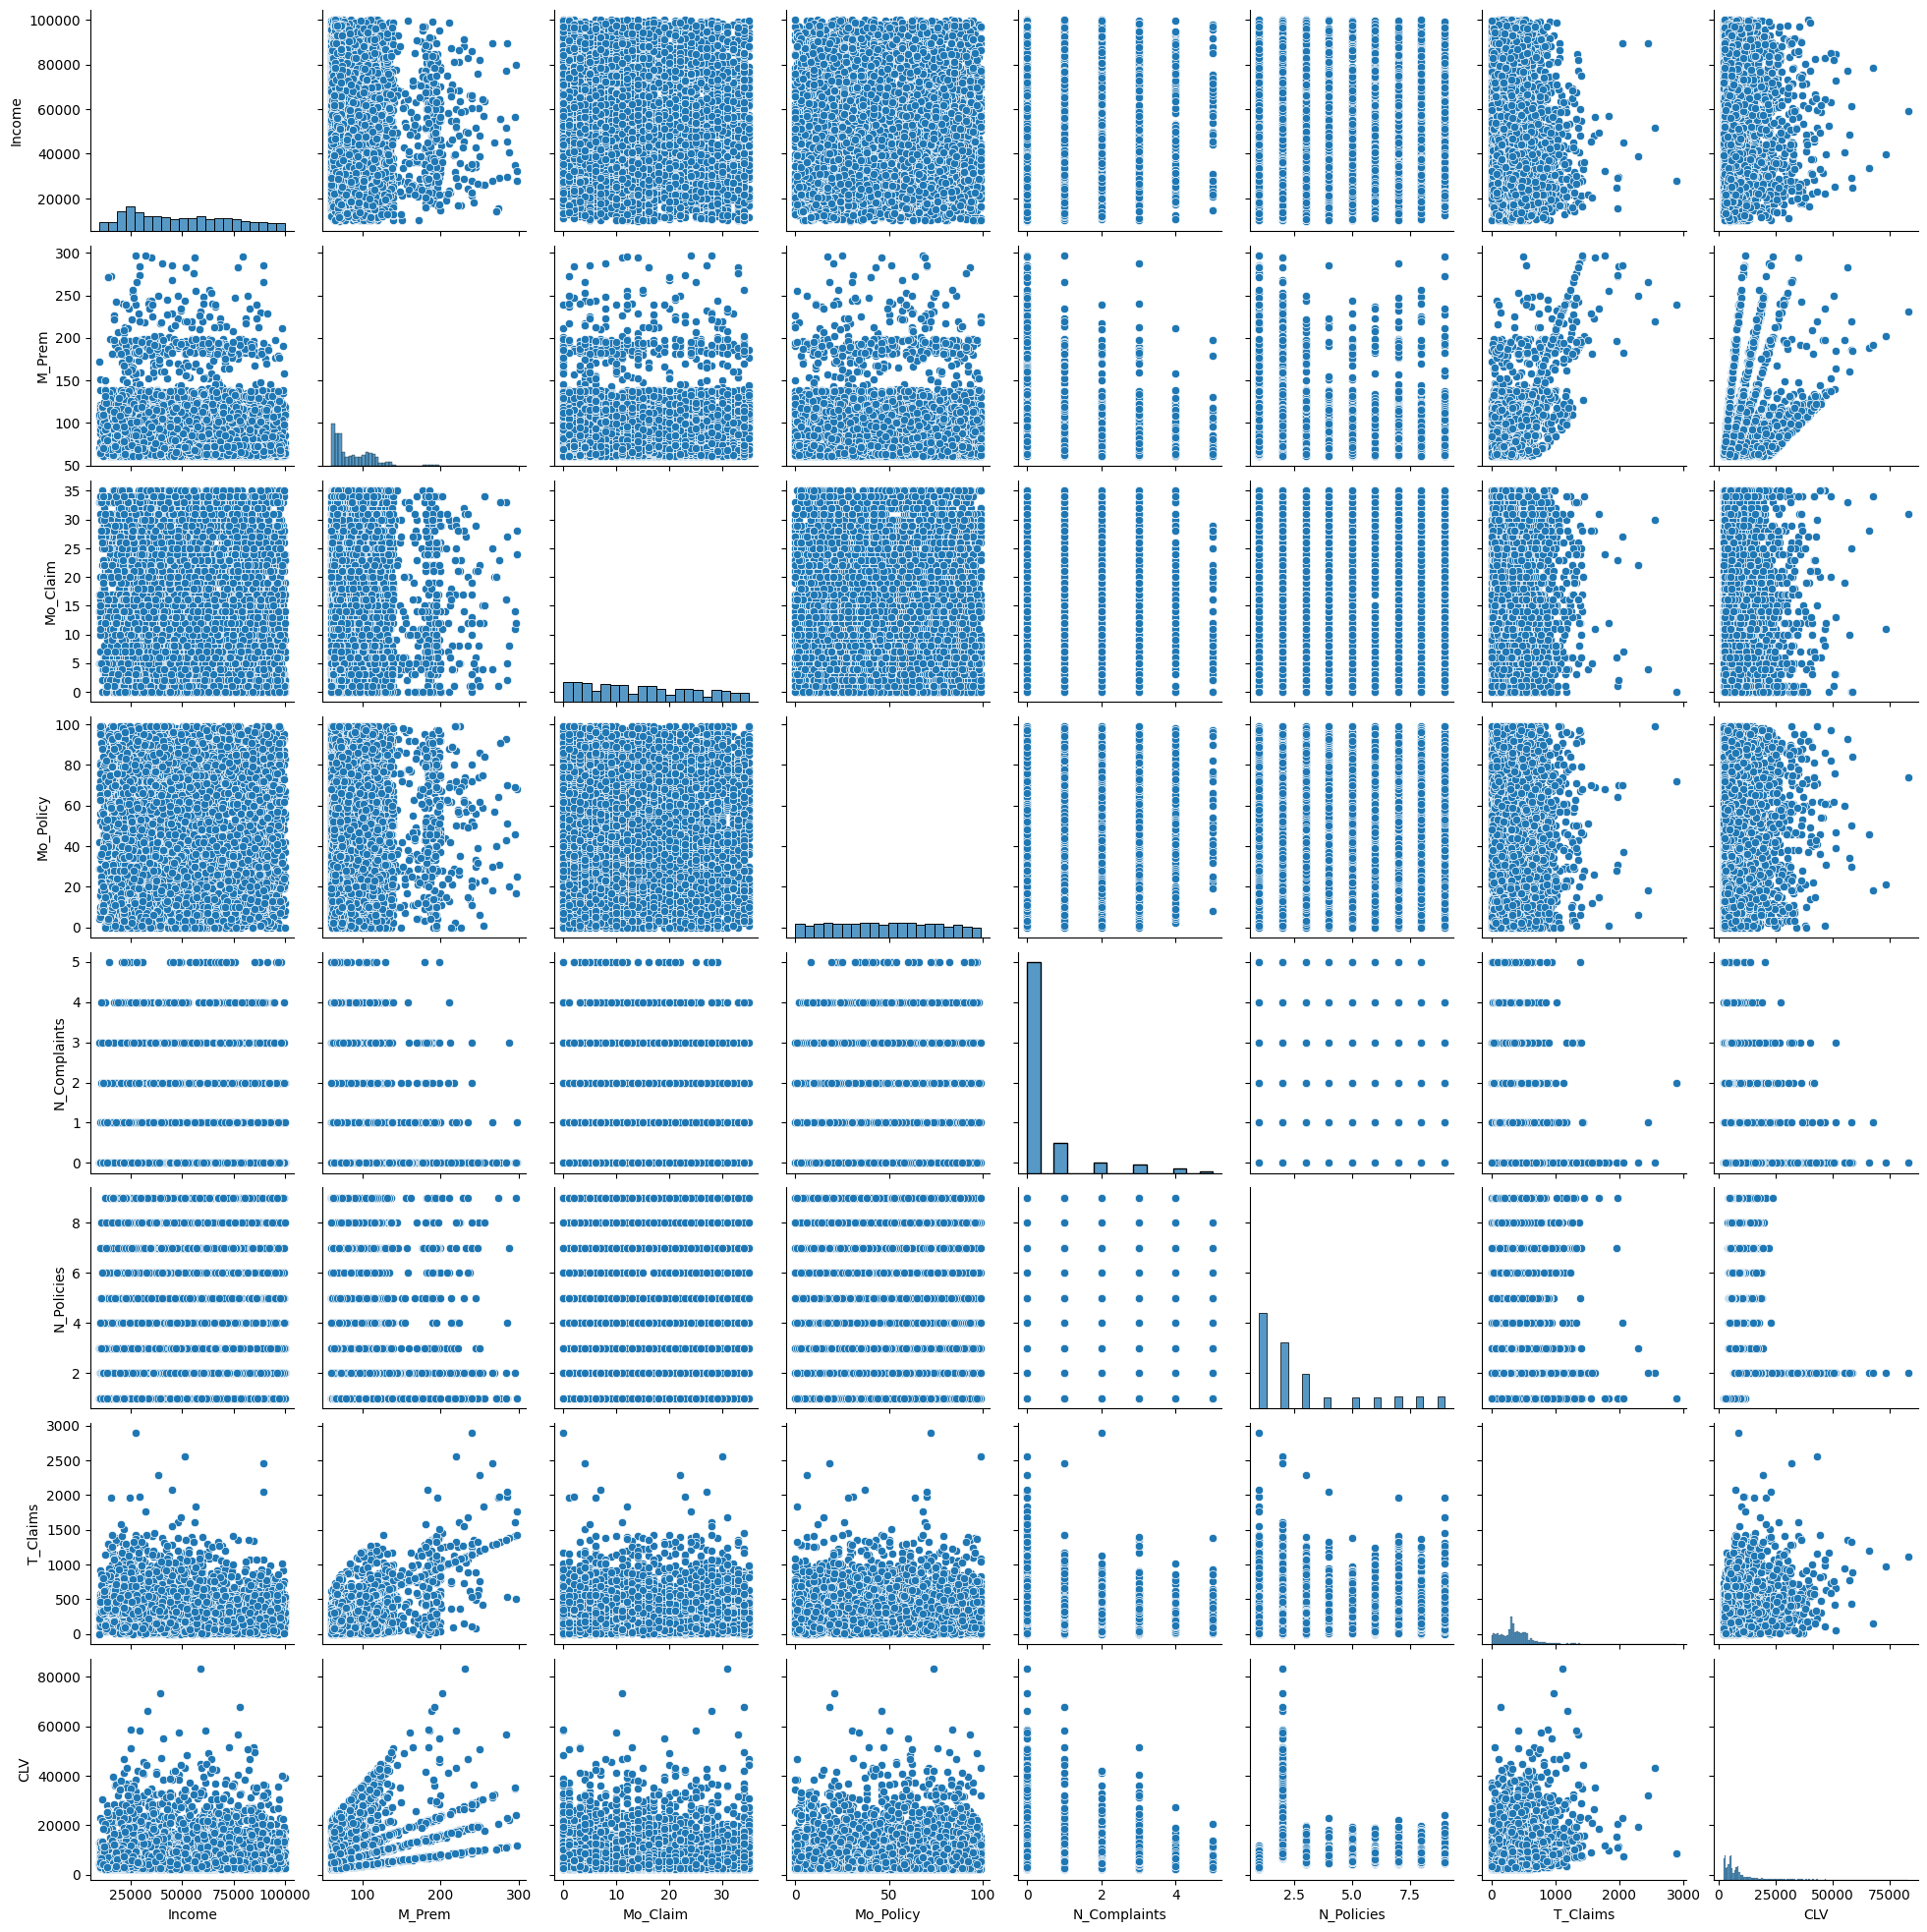

In [ ]:
import seaborn as sns

numerical_columns = ['Income', 'M_Prem', 'Mo_Claim', 'Mo_Policy',
                     'N_Complaints', 'N_Policies', 'T_Claims', 'CLV']

#  a pair plot
sns.pairplot(CLV_Dataset[numerical_columns])
plt.show()

In [ ]:
def frequency_encode(df, categorical_columns):
    for col in categorical_columns:
        freq_map = (df[col].value_counts() / len(df)).to_dict()
        df[col] = df[col].map(freq_map)
    return df

CLV_Dataset_encoded = frequency_encode(CLV_Dataset.copy(), categorical_columns)

encoded_data = pd.get_dummies(CLV_Dataset_encoded, columns=categorical_columns, drop_first=True)

print(CLV_Dataset_encoded.shape)


(6817, 19)


In [ ]:
CLV_Dataset_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         6817 non-null   float64
 1   Coverage      6817 non-null   float64
 2   Education     6817 non-null   float64
 3   Emp_Status    6817 non-null   float64
 4   Gender        6817 non-null   float64
 5   Income        6817 non-null   int64  
 6   Loc_Code      6817 non-null   float64
 7   M_Status      6817 non-null   float64
 8   M_Prem        6817 non-null   int64  
 9   Mo_Claim      6817 non-null   int64  
 10  Mo_Policy     6817 non-null   int64  
 11  N_Complaints  6817 non-null   int64  
 12  N_Policies    6817 non-null   int64  
 13  P_Type        6817 non-null   float64
 14  S_Channel     6817 non-null   float64
 15  T_Claims      6817 non-null   float64
 16  V_Class       6817 non-null   float64
 17  V_Size        6817 non-null   float64
 18  CLV           6817 non-null 

In [ ]:
# List of boolean columns
boolean_columns = ['State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
                   'Coverage_Extended', 'Coverage_Premium',
                   'Education_College', 'Education_Doctor', 'Education_High School or Below', 'Education_Master',
                   'Emp_Status_Employed', 'Emp_Status_Medical Leave', 'Emp_Status_Retired',
                   'Gender_M',
                   'Loc_Code_Suburban', 'Loc_Code_Urban',
                   'M_Status_Married', 'M_Status_Single',
                   'P_Type_Personal Auto', 'P_Type_Special Auto',
                   'S_Channel_Branch', 'S_Channel_Call Center', 'S_Channel_Web',
                   'V_Class_Luxury Car', 'V_Class_Luxury SUV', 'V_Class_SUV', 'V_Class_Sports Car', 'V_Class_Two-Door Car',
                   'V_Size_Medsize', 'V_Size_Small']

missing_columns = [col for col in boolean_columns if col not in CLV_Dataset.columns]
if missing_columns:
    print("The following boolean columns are missing in the DataFrame:", missing_columns)
else:
    CLV_Dataset[boolean_columns] = CLV_Dataset[boolean_columns].astype(int)

    print("Updated DataFrame:")
    print(CLV_Dataset.head())


The following boolean columns are missing in the DataFrame: ['State_California', 'State_Nevada', 'State_Oregon', 'State_Washington', 'Coverage_Extended', 'Coverage_Premium', 'Education_College', 'Education_Doctor', 'Education_High School or Below', 'Education_Master', 'Emp_Status_Employed', 'Emp_Status_Medical Leave', 'Emp_Status_Retired', 'Gender_M', 'Loc_Code_Suburban', 'Loc_Code_Urban', 'M_Status_Married', 'M_Status_Single', 'P_Type_Personal Auto', 'P_Type_Special Auto', 'S_Channel_Branch', 'S_Channel_Call Center', 'S_Channel_Web', 'V_Class_Luxury Car', 'V_Class_Luxury SUV', 'V_Class_SUV', 'V_Class_Sports Car', 'V_Class_Two-Door Car', 'V_Size_Medsize', 'V_Size_Small']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['State', 'Coverage', 'Education', 'Emp_Status', 'Gender', 'Loc_Code',
                       'M_Status', 'P_Type', 'S_Channel', 'V_Class', 'V_Size']

ohe = OneHotEncoder()

feature_array = ohe.fit_transform(CLV_Dataset[categorical_columns]).toarray()

feature_labels = ohe.get_feature_names_out(categorical_columns)

features = pd.DataFrame(feature_array, columns=feature_labels)

CLV_Dataset_encoded = pd.concat([CLV_Dataset, features], axis=1)


CLV_Dataset_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6817 non-null   object 
 1   Coverage                        6817 non-null   object 
 2   Education                       6817 non-null   object 
 3   Emp_Status                      6817 non-null   object 
 4   Gender                          6817 non-null   object 
 5   Income                          6817 non-null   int64  
 6   Loc_Code                        6817 non-null   object 
 7   M_Status                        6817 non-null   object 
 8   M_Prem                          6817 non-null   int64  
 9   Mo_Claim                        6817 non-null   int64  
 10  Mo_Policy                       6817 non-null   int64  
 11  N_Complaints                    6817 non-null   int64  
 12  N_Policies                      68

In [ ]:
categorical_cols = CLV_Dataset_encoded.select_dtypes(include=['object'])
unique_counts = categorical_cols.nunique()
print("Number of unique values for each categorical attribute:")
print(unique_counts)


Number of unique values for each categorical attribute:
State         5
Coverage      3
Education     5
Emp_Status    4
Gender        2
Loc_Code      3
M_Status      3
P_Type        3
S_Channel     4
V_Class       6
V_Size        3
dtype: int64


In [ ]:
CLV_Dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6817 non-null   object 
 1   Coverage                        6817 non-null   object 
 2   Education                       6817 non-null   object 
 3   Emp_Status                      6817 non-null   object 
 4   Gender                          6817 non-null   object 
 5   Income                          6817 non-null   int64  
 6   Loc_Code                        6817 non-null   object 
 7   M_Status                        6817 non-null   object 
 8   M_Prem                          6817 non-null   int64  
 9   Mo_Claim                        6817 non-null   int64  
 10  Mo_Policy                       6817 non-null   int64  
 11  N_Complaints                    6817 non-null   int64  
 12  N_Policies                      68

In [ ]:
numeric_columns = CLV_Dataset_encoded.select_dtypes(include=['float64', 'int64']).columns
CLV_Dataset_numeric = CLV_Dataset_encoded[numeric_columns]

In [ ]:
CLV_Dataset_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Income                          6817 non-null   int64  
 1   M_Prem                          6817 non-null   int64  
 2   Mo_Claim                        6817 non-null   int64  
 3   Mo_Policy                       6817 non-null   int64  
 4   N_Complaints                    6817 non-null   int64  
 5   N_Policies                      6817 non-null   int64  
 6   T_Claims                        6817 non-null   float64
 7   CLV                             6817 non-null   int64  
 8   State_Arizona                   6817 non-null   float64
 9   State_California                6817 non-null   float64
 10  State_Nevada                    6817 non-null   float64
 11  State_Oregon                    6817 non-null   float64
 12  State_Washington                68

In [ ]:
CLV_Dataset_numeric.head()

,Income,M_Prem,Mo_Claim,Mo_Policy,N_Complaints,N_Policies,T_Claims,CLV,State_Arizona,State_California,...,S_Channel_Web,V_Class_Four-Door Car,V_Class_Luxury Car,V_Class_Luxury SUV,V_Class_SUV,V_Class_Sports Car,V_Class_Two-Door Car,V_Size_Large,V_Size_Medsize,V_Size_Small
0,56274,69,32,5,0,1,384.811147,2764,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,48767,108,18,38,0,2,566.472247,12887,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,43836,73,12,44,0,1,138.130879,2814,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,62902,69,14,94,0,2,159.383042,8256,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,55350,67,0,13,0,9,321.600000,5381,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = CLV_Dataset_encoded.drop(columns=['CLV'])
y = CLV_Dataset_encoded['CLV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

test_data_prediction = regressor.predict(X_test)

error_score = r2_score(y_test, test_data_prediction)
print("R squared error:", error_score)


ValueError: could not convert string to float: 'California'

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = CLV_Dataset_encoded.drop(columns=['CLV'])
y = CLV_Dataset_encoded['CLV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_scaled, y_train)

test_data_prediction = svm_regressor.predict(X_test_scaled)

error_score = r2_score(y_test, test_data_prediction)
print("R squared error:", error_score)


NameError: name 'CLV_Dataset_encoded' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = CLV_Dataset_encoded.drop(columns=['CLV'])
y = CLV_Dataset_encoded['CLV']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

svm_regressor_poly = SVR(kernel='poly', degree=3)

svm_regressor_poly.fit(X_train_scaled, y_train)

test_data_prediction_poly = svm_regressor_poly.predict(X_test_scaled)

error_score_poly = r2_score(y_test, test_data_prediction_poly)
print("R squared error:", error_score_poly)


RBF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = CLV_Dataset_encoded.drop(columns=['CLV'])
y = CLV_Dataset_encoded['CLV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

svm_regressor_rbf = SVR(kernel='rbf')

svm_regressor_rbf.fit(X_train_scaled, y_train)

test_data_prediction_rbf = svm_regressor_rbf.predict(X_test_scaled)

error_score_rbf = r2_score(y_test, test_data_prediction_rbf)
print("R squared error:", error_score_rbf)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X = CLV_Dataset_encoded.drop(columns=['CLV'])
y = CLV_Dataset_encoded['CLV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

test_data_prediction_nn = model.predict(X_test_scaled).flatten()

error_score_nn = r2_score(y_test, test_data_prediction_nn)
print("R squared error:", error_score_nn)


In [ ]:
X.head()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compute R-squared
r2 = r2_score(y_test, Y_pred_scaled)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, Y_pred_scaled)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, Y_pred_scaled, squared=False)

# Compute Adjusted R-squared
n = X_test_scaled.shape[0]  # Number of samples
p = X_test_scaled.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Adjusted R-squared:", adj_r2)


In [ ]:
y_train.shape

In [ ]:
import matplotlib.pyplot as plt


test_data_prediction = regressor.predict(X_test_scaled)

plt.plot(X_test, test_data_prediction, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.show()
